In [1]:
# import necessary libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Task 1: Implementing the intensity transformation

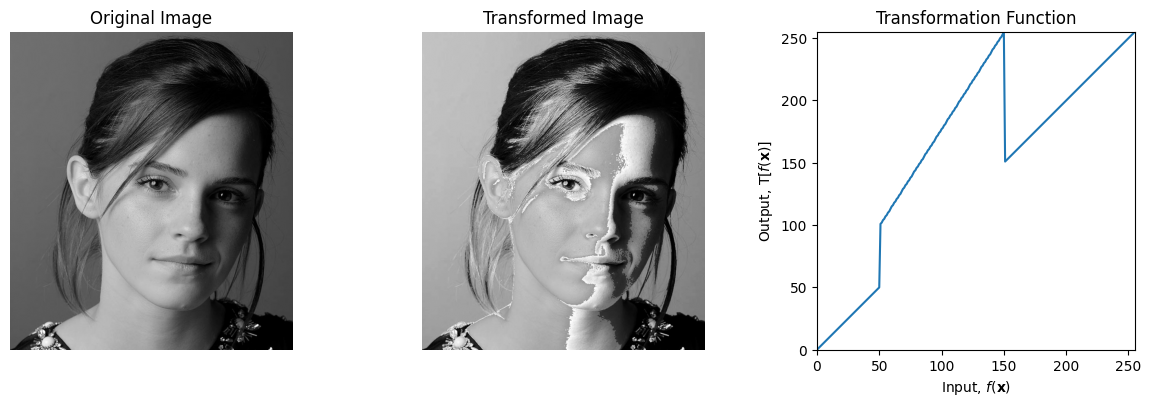

In [2]:
c = np.array([(50, 50), (50, 100), (150, 255), (150, 150), (255, 255)])

t1 = np.linspace(0, c[0, 0], c[0, 1] + 1 - 0).astype('uint8')
t2 = np.linspace(c[0, 1] + 1, c[1, 1], c[1, 0] - c[0, 0]).astype('uint8')
t3 = np.linspace(c[1, 1] + 1, c[2, 1], c[2, 0] - c[1, 0]).astype('uint8')
t4 = np.linspace(c[2, 1] + 1, c[3, 1], c[3, 0] - c[2, 0]).astype('uint8')
t5 = np.linspace(c[3, 1] + 1, c[4, 1], c[4, 0] - c[3, 0]).astype('uint8')

transform = np.concatenate((t1, t2, t3, t4, t5), axis=0).astype('uint8')
im_emma = cv.imread("a1images\\emma.jpg", cv.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(im_emma, cmap='gray', vmin=0, vmax=255)
ax[0].axis('off')
ax[0].set_title('Original Image')

ax[1].imshow(cv.LUT(im_emma, transform), cmap='gray', vmin=0, vmax=255)
ax[1].axis('off')
ax[1].set_title('Transformed Image')

ax[2].plot(transform)
ax[2].set_title('Transformation Function')
ax[2].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[2].set_ylabel('Output, $\\mathrm{T}[f(\\mathbf{x})]$')
ax[2].set_xlim(0, 255)
ax[2].set_ylim(0, 255)
ax[2].set_aspect('equal')

plt.tight_layout()
plt.show()

### Task 2: Apply operations to accentuate
(a) white matter
(b) gray matter

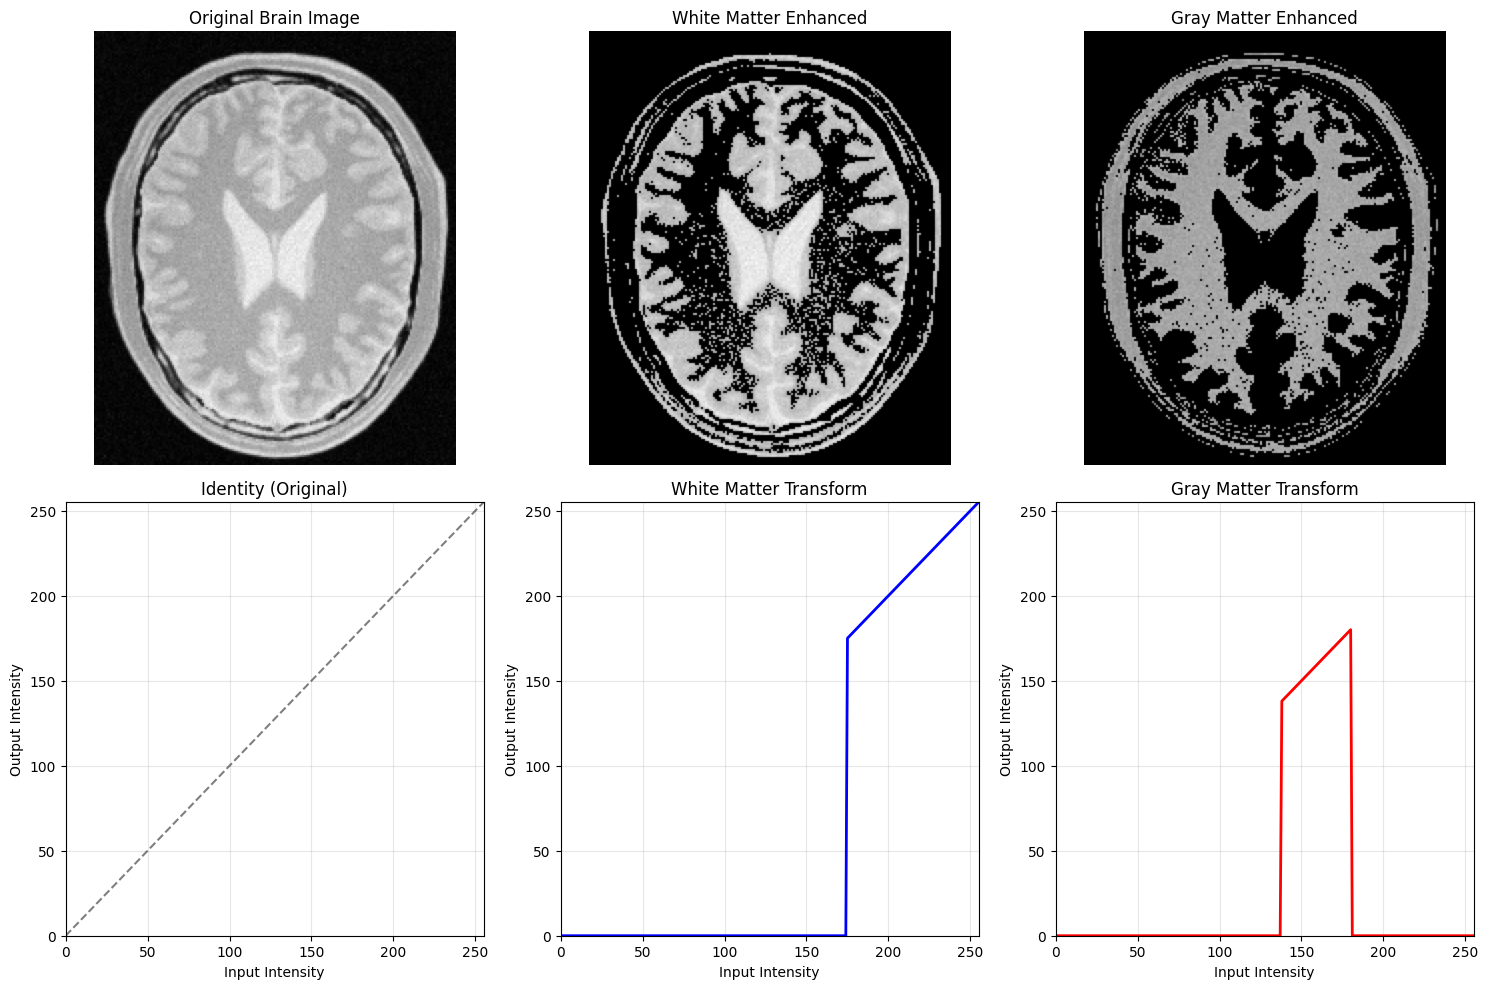

In [3]:
# Load brain image
img_orig = cv.imread("a1images\\brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)

# Task 2a: Accentuate white matter (higher intensity regions)
def create_white_matter_lut(threshold=175):
    lut = np.arange(256, dtype='uint8')
    lut[lut < threshold] = 0
    return lut

# Task 2b: Accentuate gray matter (mid-intensity regions)
def create_gray_matter_lut(lower=138, upper=180):
    lut = np.arange(256, dtype='uint8')
    lut[(lut < lower) | (lut > upper)] = 0
    return lut

# Create transformation lookup tables
white_matter = create_white_matter_lut(175)
gray_matter = create_gray_matter_lut(138, 180)

# Apply transformations
white_transform = cv.LUT(img_orig, white_matter)
gray_transform = cv.LUT(img_orig, gray_matter)

# Display results
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

# Top row: Images
ax[0, 0].imshow(img_orig, cmap='gray', vmin=0, vmax=255)
ax[0, 0].set_title('Original Brain Image')
ax[0, 0].axis('off')

ax[0, 1].imshow(white_transform, cmap='gray', vmin=0, vmax=255)
ax[0, 1].set_title('White Matter Enhanced')
ax[0, 1].axis('off')

ax[0, 2].imshow(gray_transform, cmap='gray', vmin=0, vmax=255)
ax[0, 2].set_title('Gray Matter Enhanced')
ax[0, 2].axis('off')

# Bottom row: Transformation functions
ax[1, 0].plot(range(256), range(256), 'k--', alpha=0.5, label='Identity')
ax[1, 0].set_title('Identity (Original)')
ax[1, 0].set_xlabel('Input Intensity')
ax[1, 0].set_ylabel('Output Intensity')
ax[1, 0].set_xlim(0, 255)
ax[1, 0].set_ylim(0, 255)
ax[1, 0].grid(True, alpha=0.3)

ax[1, 1].plot(white_matter, 'b-', linewidth=2)
ax[1, 1].set_title('White Matter Transform')
ax[1, 1].set_xlabel('Input Intensity')
ax[1, 1].set_ylabel('Output Intensity')
ax[1, 1].set_xlim(0, 255)
ax[1, 1].set_ylim(0, 255)
ax[1, 1].grid(True, alpha=0.3)

ax[1, 2].plot(gray_matter, 'r-', linewidth=2)
ax[1, 2].set_title('Gray Matter Transform')
ax[1, 2].set_xlabel('Input Intensity')
ax[1, 2].set_ylabel('Output Intensity')
ax[1, 2].set_xlim(0, 255)
ax[1, 2].set_ylim(0, 255)
ax[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# print(f"White matter enhancement: Highlights intensities above {white_threshold_lower}")
# print(f"Gray matter enhancement: Highlights intensities between {gray_threshold_lower}-{gray_threshold_upper}")

### Task 3: Gamma correction in L*a*b* color space

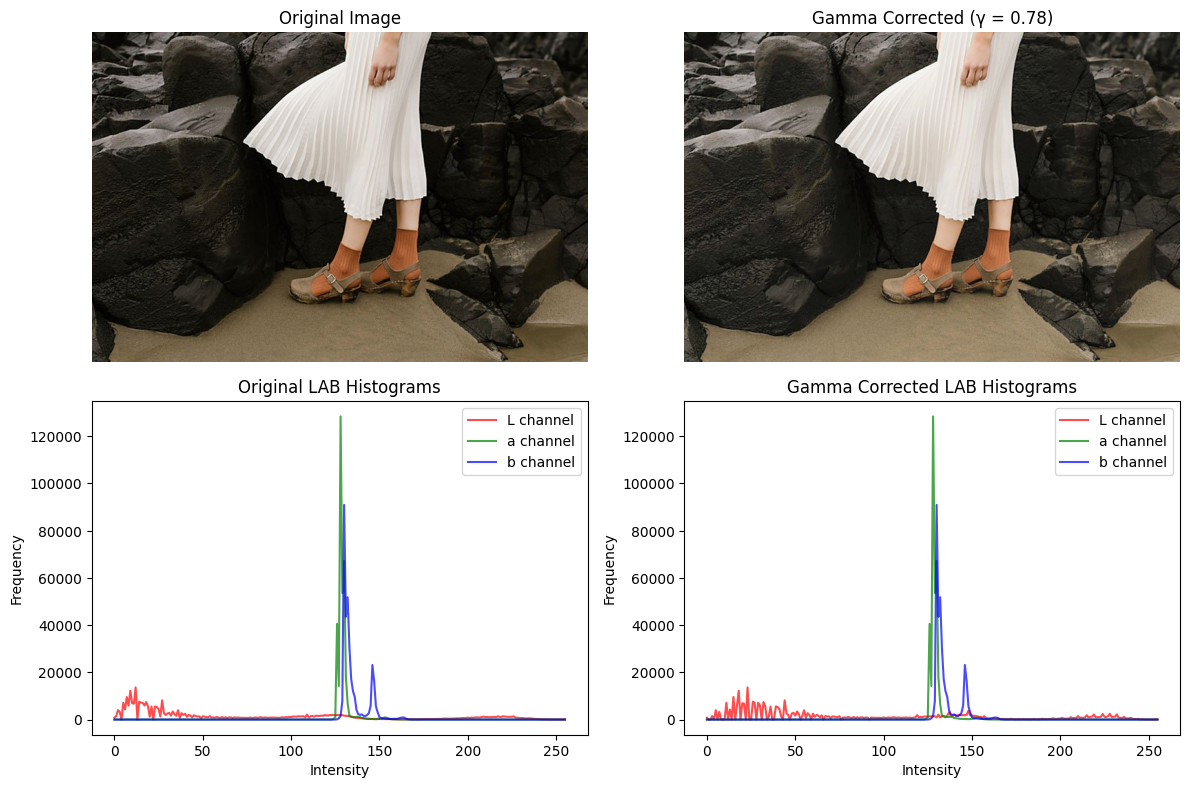

In [4]:
im = cv.imread("a1images\\highlights_and_shadows.jpg")  # Read normally first
im_lab = cv.cvtColor(im, cv.COLOR_BGR2LAB)
L, a, b = cv.split(im_lab)

gamma = 0.78
L_corrected = np.array([((i / 255.0) ** gamma) * 255.0 for i in range(0, 256)]).astype('uint8')
L_gamma = cv.LUT(L, L_corrected)

lab_corrected = cv.merge((L_gamma, a, b))
im_corrected = cv.cvtColor(lab_corrected, cv.COLOR_LAB2RGB)

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Original and corrected images
ax[0, 0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[0, 0].set_title('Original Image')
ax[0, 0].axis('off')

ax[0, 1].imshow(im_corrected)  # Remove the extra cvtColor call
ax[0, 1].set_title(f'Gamma Corrected (γ = {gamma})')
ax[0, 1].axis('off')

space = ('L', 'a', 'b')
colors = ('red', 'green', 'blue')
images = [im_lab, lab_corrected]
titles = ['Original LAB Histograms', 'Gamma Corrected LAB Histograms']

for j, (img, title) in enumerate(zip(images, titles)):
    for i, (channel, color) in enumerate(zip(space, colors)):
        hist = cv.calcHist([img], [i], None, [256], [0, 256])
        ax[1, j].plot(hist, color=color, label=f'{channel} channel', alpha=0.7)
    
    ax[1, j].set_title(title)
    ax[1, j].set_xlabel('Intensity')
    ax[1, j].set_ylabel('Frequency')
    ax[1, j].legend()

plt.tight_layout()
plt.show()

### Task 4: Vibrance via saturation-plane intensity transformation (interactive)

We increase vibrance by boosting the saturation channel S in HSV using:

f(x) = min(x + a * 128 * exp(-(x - 128)^2 / (2σ^2)), 255)

- x: input saturation (0–255)
- a ∈ [0, 1] controls boost strength (use the slider)
- σ = 70 controls the width of the boost around mid saturation

In [5]:
from ipywidgets import interact, FloatSlider

img = cv.imread("a1images\\spider.png")
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

sigma = 70.0
x = np.arange(256, dtype=np.float32)

def vibranceCurve(a):
    boost = a * 128.0 * np.exp(-((x - 128.0) ** 2) / (2.0 * sigma * sigma))
    fx = np.minimum(x + boost, 255.0)
    return fx.astype(np.uint8)

@interact(a=FloatSlider(value=0.6, min=0.0, max=1.0, step=0.02, description='a'))
def applyVibrance(a=0.6):

    img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    h, s, v = cv.split(img_hsv)

    # Build LUT for current 'a' and apply to S channel
    lut = vibranceCurve(a)
    s_boost = cv.LUT(s, lut)

    # Recombine and convert back to RGB for display
    hsv_boost = cv.merge([h, s_boost, v])
    img_boost_bgr = cv.cvtColor(hsv_boost, cv.COLOR_HSV2BGR)
    img_boost_rgb = cv.cvtColor(img_boost_bgr, cv.COLOR_BGR2RGB)

    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    ax[0].imshow(img_rgb)
    ax[0].set_title('Original (RGB)')
    ax[0].axis('off')

    ax[1].imshow(img_boost_rgb)
    ax[1].set_title(f'Vibrance Enhanced (a = {a:.2f})')
    ax[1].axis('off')

    ax[2].plot(x, x, 'k--', alpha=0.5, label='Identity')
    ax[2].plot(x, vibranceCurve(a), label='f(x)')
    ax[2].set_title('Saturation Transformation f(x)')
    ax[2].set_xlabel('Input S')
    ax[2].set_ylabel('Output S')
    ax[2].set_xlim(0, 255)
    ax[2].set_ylim(0, 255)
    ax[2].legend()
    ax[2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print(f"Chosen a: {a:.2f}")

interactive(children=(FloatSlider(value=0.6, description='a', max=1.0, step=0.02), Output()), _dom_classes=('w…

### Task 5: Historgram equilization

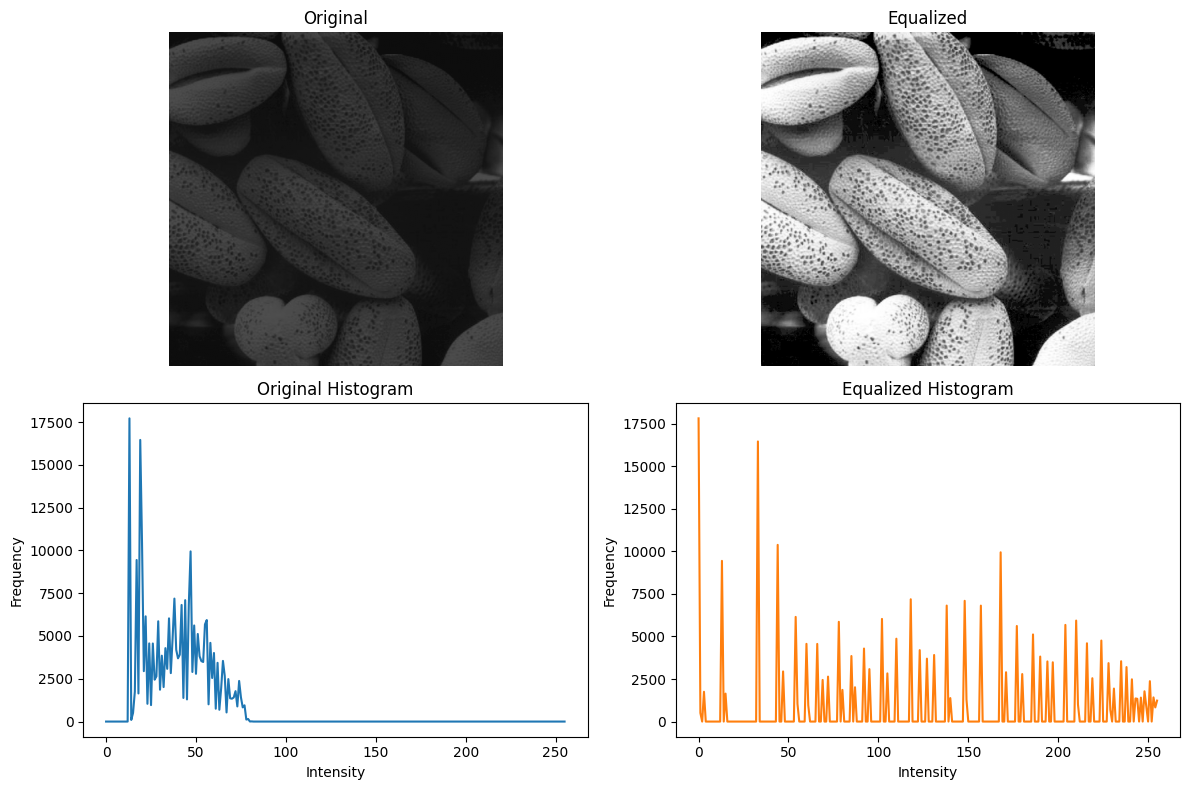

In [6]:
def hist_equalize(img_gray: np.ndarray):

    hist, _ = np.histogram(img_gray.ravel(), bins=256, range=(0, 256))

    # CDF (cumulative distribution function)
    cdf = hist.cumsum()

    # Normalize CDF to 0..255 using the standard formula with cdf_min
    cdf_min = cdf[cdf > 0].min() if np.any(cdf > 0) else 0
    denom = (img_gray.size - cdf_min) if img_gray.size > cdf_min else 1
    lut = np.round((cdf - cdf_min) * 255.0 / denom).clip(0, 255).astype(np.uint8)

    # Map using LUT
    eq = lut[img_gray]

    # Histogram after
    hist_after, _ = np.histogram(eq.ravel(), bins=256, range=(0, 256))
    return eq, hist, hist_after

img_gray = cv.imread("a1images\\shells.tif", cv.IMREAD_GRAYSCALE)

img_eq, hist_before, hist_after = hist_equalize(img_gray)

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0, 0].imshow(img_gray, cmap="gray", vmin=0, vmax=255)
ax[0, 0].set_title(f"Original")
ax[0, 0].axis("off")

ax[0, 1].imshow(img_eq, cmap="gray", vmin=0, vmax=255)
ax[0, 1].set_title("Equalized")
ax[0, 1].axis("off")

ax[1, 0].plot(hist_before, color="tab:blue")
ax[1, 0].set_title("Original Histogram")
ax[1, 0].set_xlabel("Intensity")
ax[1, 0].set_ylabel("Frequency")

ax[1, 1].plot(hist_after, color="tab:orange")
ax[1, 1].set_title("Equalized Histogram")
ax[1, 1].set_xlabel("Intensity")
ax[1, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

### Task 6: Histogram equalization on foreground only

(a) Open the color image (Fig. 6), convert to HSV, and display H, S, V planes in grayscale.
(b) Select a suitable plane to threshold and extract a binary foreground mask.
(c) Use `cv.bitwise_and` to obtain the foreground; compute its histogram (on the chosen plane).
(d) Compute the cumulative sum (`np.cumsum`) of that histogram.
(e) Equalize the foreground using the standard histogram equalization formula on the chosen plane only.
(f) Keep the background unchanged and composite it with the equalized foreground; show H, S, V, mask, original, and final result.

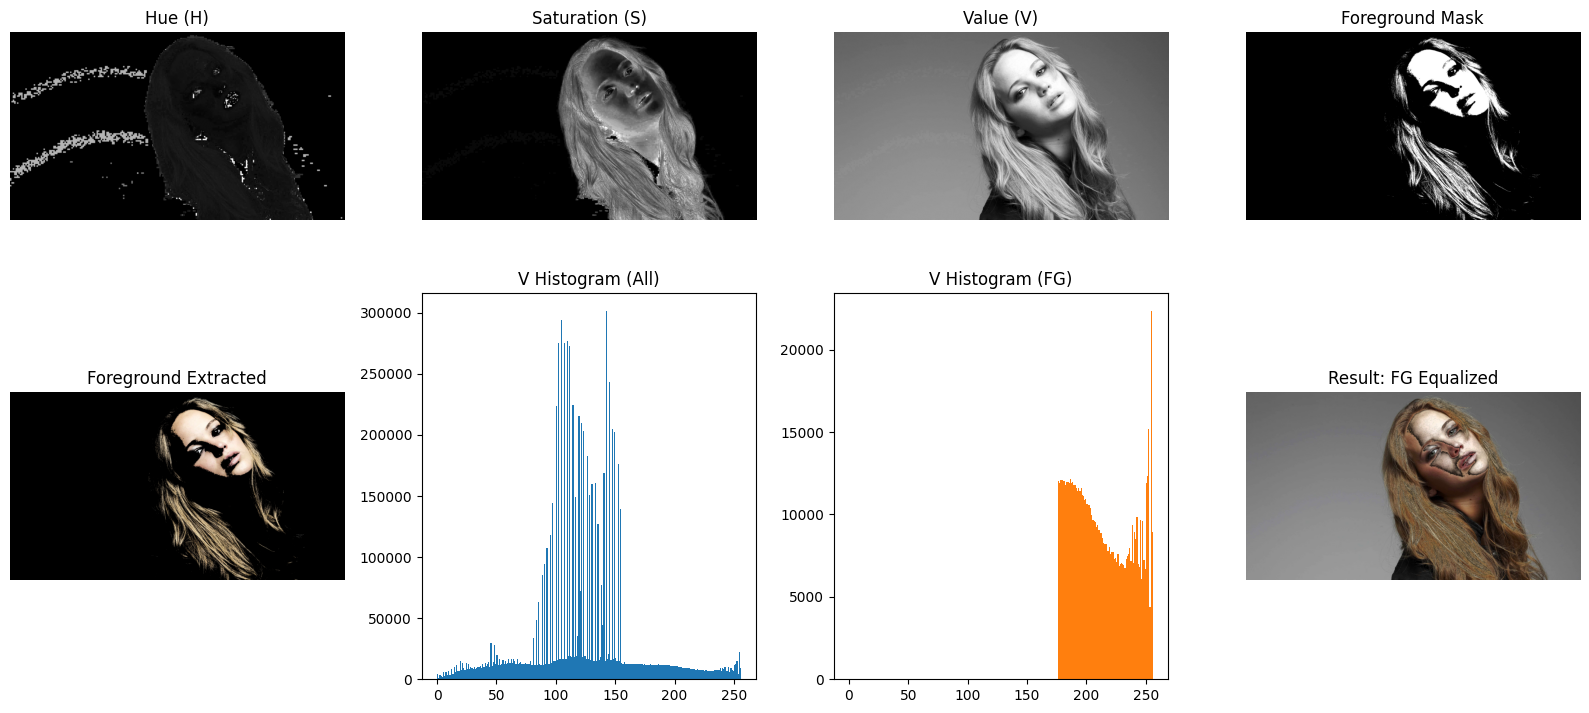

In [7]:
# ...existing code...
img_bgr = cv.imread("a1images\\jeniffer.jpg")
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

# (a) Convert to HSV and split
img_hsv = cv.cvtColor(img_bgr, cv.COLOR_BGR2HSV)
H, S, V = cv.split(img_hsv)

# (b) Threshold (currently using V; change to S if you truly meant saturation)
threshold_value = 175
_, foreground_mask = cv.threshold(V, threshold_value, 255, cv.THRESH_BINARY)

# (c) Foreground (RGB) using mask
foreground = cv.bitwise_and(img_rgb, img_rgb, mask=foreground_mask)

# (d) Histogram of foreground V pixels
fg_pixels = V[foreground_mask == 255]
hist_fg, _ = np.histogram(fg_pixels, bins=256, range=(0, 256))

# (e) CDF and LUT (standard histogram equalization on foreground only)
cdf = hist_fg.cumsum()
cdf_min = cdf[cdf > 0].min() if np.any(cdf > 0) else 0
total_foreground_pixels = np.sum(foreground_mask == 255)
denom = (total_foreground_pixels - cdf_min) if total_foreground_pixels > cdf_min else 1
lut = np.round((cdf - cdf_min) * 255.0 / denom).clip(0, 255).astype(np.uint8)

# Apply LUT only to foreground pixels
V_eq = V.copy()
V_eq[foreground_mask == 255] = lut[V[foreground_mask == 255]]

# (f) Reconstruct result
hsv_eq = cv.merge([H, S, V_eq])
res_rgb = cv.cvtColor(cv.cvtColor(hsv_eq, cv.COLOR_HSV2BGR), cv.COLOR_BGR2RGB)

# Visualize
fig, ax = plt.subplots(2, 4, figsize=(16, 8))
ax[0, 0].imshow(H, cmap='gray'); ax[0, 0].set_title('Hue (H)'); ax[0, 0].axis('off')
ax[0, 1].imshow(S, cmap='gray'); ax[0, 1].set_title('Saturation (S)'); ax[0, 1].axis('off')
ax[0, 2].imshow(V, cmap='gray'); ax[0, 2].set_title('Value (V)'); ax[0, 2].axis('off')
ax[0, 3].imshow(foreground_mask, cmap='gray'); ax[0, 3].set_title('Foreground Mask'); ax[0, 3].axis('off')

ax[1, 0].imshow(foreground); ax[1, 0].set_title('Foreground Extracted'); ax[1, 0].axis('off')
ax[1, 1].hist(V.ravel(), bins=256, range=(0, 256), color='tab:blue'); ax[1, 1].set_title('V Histogram (All)')
ax[1, 2].hist(fg_pixels.ravel(), bins=256, range=(0, 256), color='tab:orange'); ax[1, 2].set_title('V Histogram (FG)')
ax[1, 3].imshow(res_rgb); ax[1, 3].set_title('Result: FG Equalized'); ax[1, 3].axis('off')

plt.tight_layout(); plt.show()

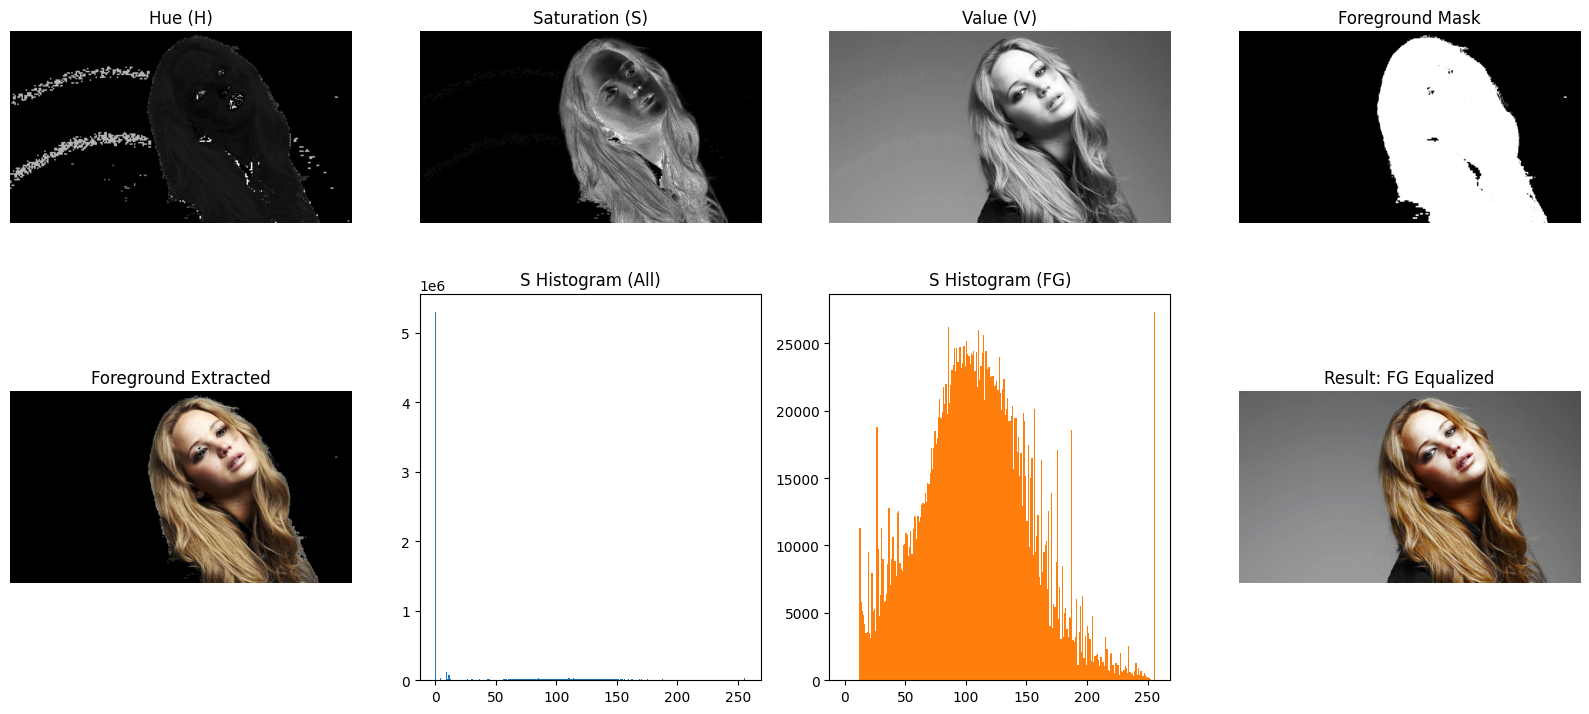

In [8]:
# ...existing code...
img_bgr = cv.imread("a1images\\jeniffer.jpg")
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

# (a) Convert to HSV and split
img_hsv = cv.cvtColor(img_bgr, cv.COLOR_BGR2HSV)
H, S, V = cv.split(img_hsv)

# (b) Threshold (currently using V; change to S if you truly meant saturation)
threshold_value = 11
_, foreground_mask = cv.threshold(S, threshold_value, 255, cv.THRESH_BINARY)

# (c) Foreground (RGB) using mask
foreground = cv.bitwise_and(img_rgb, img_rgb, mask=foreground_mask)

# (d) Histogram of foreground V pixels
fg_pixels = S[foreground_mask == 255]
hist_fg, _ = np.histogram(fg_pixels, bins=256, range=(0, 256))

# (e) CDF and LUT (standard histogram equalization on foreground only)
cdf = hist_fg.cumsum()
cdf_min = cdf[cdf > 0].min() if np.any(cdf > 0) else 0
total_foreground_pixels = np.sum(foreground_mask == 255)
denom = (total_foreground_pixels - cdf_min) if total_foreground_pixels > cdf_min else 1
lut = np.round((cdf - cdf_min) * 255.0 / denom).clip(0, 255).astype(np.uint8)

# Apply LUT only to foreground pixels
S_eq = S.copy()
S_eq[foreground_mask == 255] = lut[S[foreground_mask == 255]]

# (f) Reconstruct result
hsv_eq = cv.merge([H, S_eq, V])
res_rgb = cv.cvtColor(cv.cvtColor(hsv_eq, cv.COLOR_HSV2BGR), cv.COLOR_BGR2RGB)

# Visualize
fig, ax = plt.subplots(2, 4, figsize=(16, 8))
ax[0, 0].imshow(H, cmap='gray'); ax[0, 0].set_title('Hue (H)'); ax[0, 0].axis('off')
ax[0, 1].imshow(S, cmap='gray'); ax[0, 1].set_title('Saturation (S)'); ax[0, 1].axis('off')
ax[0, 2].imshow(V, cmap='gray'); ax[0, 2].set_title('Value (V)'); ax[0, 2].axis('off')
ax[0, 3].imshow(foreground_mask, cmap='gray'); ax[0, 3].set_title('Foreground Mask'); ax[0, 3].axis('off')

ax[1, 0].imshow(foreground); ax[1, 0].set_title('Foreground Extracted'); ax[1, 0].axis('off')
ax[1, 1].hist(S.ravel(), bins=256, range=(0, 256), color='tab:blue'); ax[1, 1].set_title('S Histogram (All)')
ax[1, 2].hist(fg_pixels.ravel(), bins=256, range=(0, 256), color='tab:orange'); ax[1, 2].set_title('S Histogram (FG)')
ax[1, 3].imshow(res_rgb); ax[1, 3].set_title('Result: FG Equalized'); ax[1, 3].axis('off')

plt.tight_layout(); plt.show()

### Task 7: Sobel Filtering

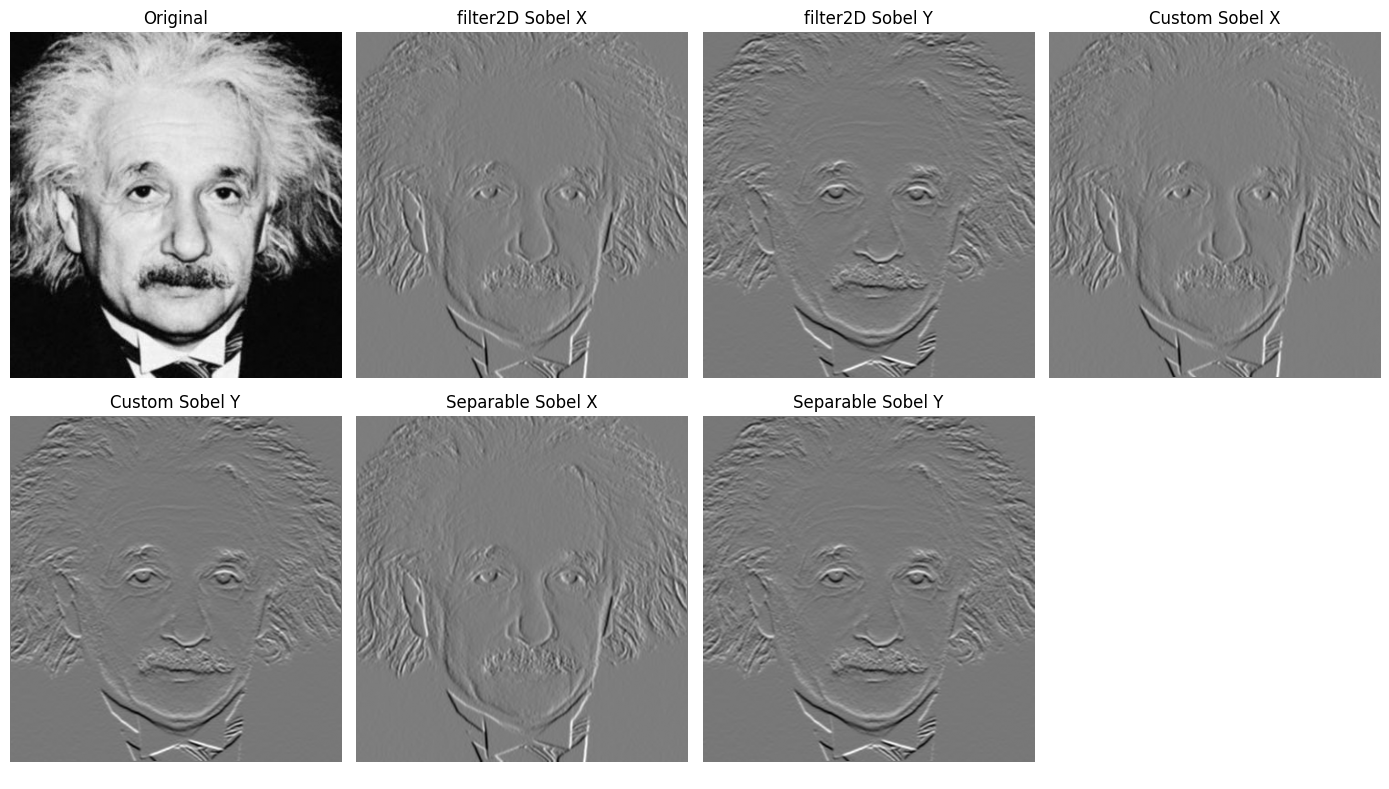

In [9]:
# Task 7 (simplified): Sobel filtering (einstein)
# Show only: Original, filter2D, Custom, Separable (gradient magnitude)

# Load image (grayscale)
img = cv.imread("a1images\\einstein.png", cv.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("Could not load 'a1images\\einstein.png'. Check the path.")

# Sobel kernels
sobel_x = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])

sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

# (a) filter2D
im_x = cv.filter2D(img, cv.CV_64F, sobel_x)
im_y = cv.filter2D(img, cv.CV_64F, sobel_y)

# (b) Custom convolution (exact same logic structure you provided)
# NOTE: Leaves a 1-pixel zero border (no padding), computes valid 3x3 windows.
def custom_filter(image, filter):
    rows, cols = image.shape
    result = np.zeros((rows, cols), dtype=np.float64)

    for r in range(rows - 2):
        for c in range(cols - 2):
            patch = image[r:r+3, c:c+3]
            result[r + 1, c + 1] = np.sum(filter * patch)
    return result

im_x_custom = custom_filter(img, sobel_x)
im_y_custom = custom_filter(img, sobel_y)


# (c) Separable (associative property)
# Gx = [1 2 1]^T * [1 0 -1]
kernel_gx_col = np.array([[1], [2], [1]], dtype=np.float32) # Column vector
kernel_gx_row = np.array([[1, 0, -1]], dtype=np.float32) # Row vector

# Gy = [1 0 -1]^T * [1 2 1]
kernel_gy_col = np.array([[1], [0], [-1]], dtype=np.float32) # Column vector
kernel_gy_row = np.array([[1, 2, 1]], dtype=np.float32) # Row vector

# Apply separable filters for Gx
im_x_separable_temp = cv.filter2D(img, cv.CV_64F, kernel_gx_row)
im_x_separable = cv.filter2D(im_x_separable_temp, cv.CV_64F, kernel_gx_col)

# Apply separable filters for Gy
im_y_separable_temp = cv.filter2D(img, cv.CV_64F, kernel_gy_row)
im_y_separable = cv.filter2D(im_y_separable_temp, cv.CV_64F, kernel_gy_col)

# Show outputs
fig, ax = plt.subplots(2, 4, figsize=(14, 8))
ax[0, 0].imshow(img, cmap='gray'); ax[0, 0].set_title('Original'); ax[0, 0].axis('off')
ax[0, 1].imshow(im_x, cmap='gray'); ax[0, 1].set_title('filter2D Sobel X'); ax[0, 1].axis('off')
ax[0, 2].imshow(im_y, cmap='gray'); ax[0, 2].set_title('filter2D Sobel Y'); ax[0, 2].axis('off')
ax[0, 3].imshow(im_x_custom, cmap='gray'); ax[0, 3].set_title('Custom Sobel X'); ax[0, 3].axis('off')
ax[1, 0].imshow(im_y_custom, cmap='gray'); ax[1, 0].set_title('Custom Sobel Y'); ax[1, 0].axis('off')
ax[1, 1].imshow(im_x_separable, cmap='gray'); ax[1, 1].set_title('Separable Sobel X'); ax[1, 1].axis('off')
ax[1, 2].imshow(im_y_separable, cmap='gray'); ax[1, 2].set_title('Separable Sobel Y'); ax[1, 2].axis('off')
ax[1, 3].axis('off')

plt.tight_layout(); plt.show()

### Task 8: Image Zoom (Nearest Neighbour & Bilinear) + Normalized SSD

Requirements:
1. Implement a function `zoom_image(img, scale, method)` for scale s in (0, 10].
   - `method='nearest'`: nearest-neighbour interpolation.
   - `method='bilinear'`: bilinear interpolation (separable, weighted average of 4 neighbours).
2. Provided: four downscaled images and their originals in `a1images/a1q5images/`.
3. Upscale each small image by factor 4 and compare with its original using normalized SSD:
   \[ \text{nSSD} = \frac{\sum (I_{up} - I_{orig})^2}{\sum I_{orig}^2 + \varepsilon} \]
4. Print a table of nSSD for nearest vs bilinear (lower is better).
5. Display (a) one small image, (b) its 4× nearest result, (c) its 4× bilinear result, (d) its original.

Notes:
- If channel counts differ (gray vs color) convert grayscale to 3-channel BGR for fair comparison.
- Minor size rounding differences after scaling are trimmed to match original size.
- Bilinear coordinate mapping uses pixel-center alignment: (dst + 0.5)/scale - 0.5.


In [16]:
def zoom_image(image, zoom_factor, interpolation_method='nearest'):

    if interpolation_method == 'nearest':
        interpolation_flag = cv.INTER_NEAREST
    else:  # 'bilinear'
        interpolation_flag = cv.INTER_LINEAR

    # Resize the image using cv.resize
    zoomed_image = cv.resize(image, (0, 0), fx=zoom_factor, fy=zoom_factor, interpolation=interpolation_flag)

    return zoomed_image

# Normalized SSD
def nssd(img_1, img_2):
    if img_1.shape != img_2.shape:
        raise ValueError(f"Dimensions must match for NSSD. img_1 shape: {img_1.shape}, img_2 shape: {img_2.shape}")

    squared_diff = (img_1 - img_2)**2
    ssd = np.sum(squared_diff)
    normalized_ssd = ssd / img_1.size

    return normalized_ssd

scale = 4

SSD (Nearest): 31.284316486625514


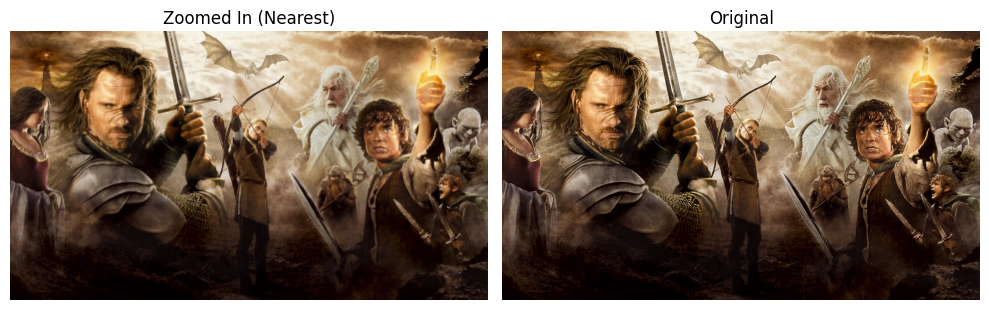

In [21]:
img_1 = cv.imread("a1images\\a1q5images\\im01.png")
img_1_small = cv.imread("a1images\\a1q5images\\im01small.png")

img_1_zoomed_in = zoom_image(img_1_small, scale, 'nearest')

ssd_nearest = nssd(img_1, img_1_zoomed_in)
print(f"SSD (Nearest): {ssd_nearest}")

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(cv.cvtColor(img_1_zoomed_in, cv.COLOR_BGR2RGB))
ax[0].set_title("Zoomed In (Nearest)")
ax[0].axis("off")

ax[1].imshow(cv.cvtColor(img_1, cv.COLOR_BGR2RGB))
ax[1].set_title("Original")
ax[1].axis("off")

plt.tight_layout()
plt.show()

SSD (Bilinear): 10.682991753472223


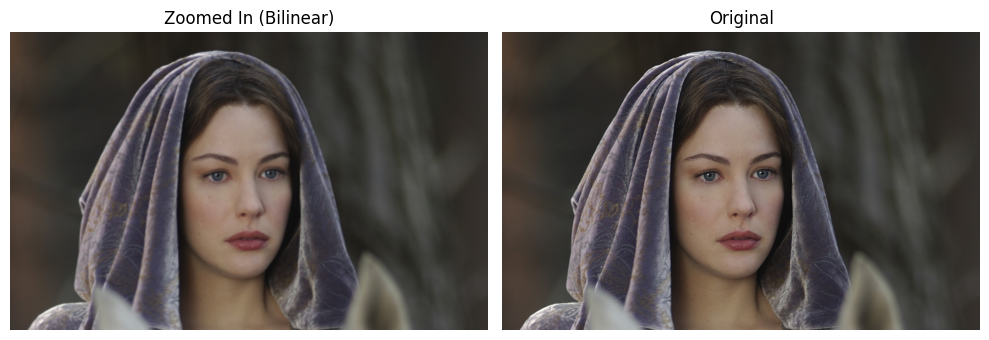

In [22]:
img_2 = cv.imread("a1images\\a1q5images\\im02.png")
img_2_small = cv.imread("a1images\\a1q5images\\im02small.png")

img_2_zoomed_in_bilinear = zoom_image(img_2_small, scale, 'bilinear')

ssd_bilinear = nssd(img_2, img_2_zoomed_in_bilinear)

print(f"SSD (Bilinear): {ssd_bilinear}")

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(cv.cvtColor(img_2_zoomed_in_bilinear, cv.COLOR_BGR2RGB))
ax[0].set_title("Zoomed In (Bilinear)")
ax[0].axis("off")

ax[1].imshow(cv.cvtColor(img_2, cv.COLOR_BGR2RGB))
ax[1].set_title("Original")
ax[1].axis("off")

plt.tight_layout()
plt.show()

### Task 9: GrabCut segmentation and background blur

(a) Segment the flower using GrabCut and show the final mask, foreground, and background.
(b) Create an enhanced image with a strongly blurred background, shown next to the original.
(c) Discuss the dark halo near the flower edge after enhancement.

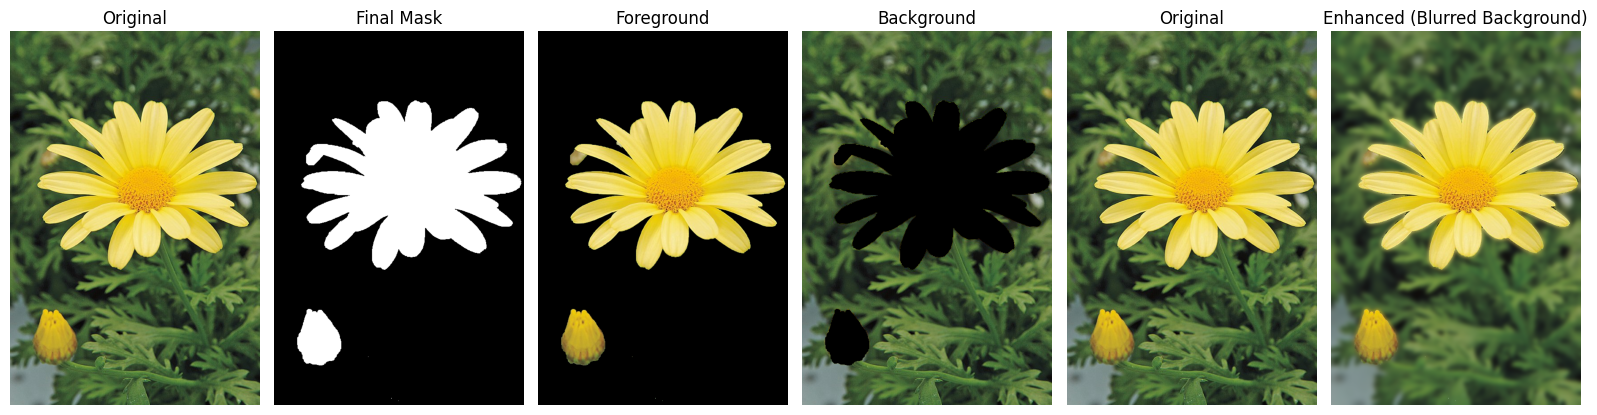

Why is the background near the flower edge dark?
- GrabCut labels an uncertain thin band around boundaries as probable background in places.
- When compositing, any semi- or fully background-labeled pixels pick blurred/darker values,
  producing a dark halo right outside the subject due to color bleeding and soft edges.
- Also, strong blur averages dark and light regions across the boundary, pulling values darker.


In [ ]:
# Use daisy.jpg as the flower image (Fig. 82)
img = cv.imread("a1images\\daisy.jpg")
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
H, W = img.shape[:2]

# Initial rectangle around the main subject
margin_y, margin_x = int(0.01*H), int(0.01*W)
rect = (margin_x, margin_y, W - 2*margin_x, H - 2*margin_y)

mask = np.zeros((H, W), np.uint8)
bgModel = np.zeros((1, 65), np.float64)
fgModel = np.zeros((1, 65), np.float64)
cv.grabCut(img, mask, rect, bgModel, fgModel, 5, cv.GC_INIT_WITH_RECT)

# Create binary masks
mask_final = np.where((mask == cv.GC_FGD) | (mask == cv.GC_PR_FGD), 1, 0).astype("uint8")
mask_bg = 1 - mask_final

# Foreground and background images
foreground = (img_rgb * mask_final[..., None]).astype(np.uint8)
background = (img_rgb * mask_bg[..., None]).astype(np.uint8)

# Blur the background
blurred_bg_rgb = cv.GaussianBlur(img_rgb, (29, 29), 0)
enhanced_rgb = (foreground + blurred_bg_rgb * mask_bg[..., None]).astype(np.uint8)


fig, ax = plt.subplots(1, 6, figsize=(16, 10))
ax[0].imshow(img_rgb); ax[0].set_title('Original'); ax[0].axis('off')
ax[1].imshow(mask_final*255, cmap='gray'); ax[1].set_title('Final Mask'); ax[1].axis('off')
ax[2].imshow(foreground); ax[2].set_title('Foreground'); ax[2].axis('off')
ax[3].imshow(background); ax[3].set_title('Background'); ax[3].axis('off')
ax[4].imshow(img_rgb); ax[4].set_title('Original'); ax[4].axis('off')
ax[5].imshow(enhanced_rgb); ax[5].set_title('Enhanced (Blurred Background)'); ax[5].axis('off')

plt.tight_layout(); plt.show()

print('Why is the background near the flower edge dark?')
print('- GrabCut labels an uncertain thin band around boundaries as probable background in places.')
print('- When compositing, any semi- or fully background-labeled pixels pick blurred/darker values,')
print('  producing a dark halo right outside the subject due to color bleeding and soft edges.')
print('- Also, strong blur averages dark and light regions across the boundary, pulling values darker.')